<left><img width=25% src="img/gw_monogram_2c.png"></left>

# Lecture 2: Machine Learning Setup

### CS6364/CS4364 Machine Learning

__Sardar Hamidian__<br>The George Washington Universiry

__Armin Mehrabian__<br>The George Washington Universiry

# Announcements

* Announcement
     * Subannounce


# Recall: Supervised Learning

The most common approach to machine learning is supervised learning.

<center><img width=70% src="img/tesla_data.png"/></center>

1. First, we collect a dataset of labeled training examples.
2. We train a model to output accurate predictions on this dataset.
3. When the model sees new, similar data, it will also be accurate.

# Part 1: An Example of a Supervised Machine Learning Problem

Let’s start by dissecting a simple example of a supervised learning problem.

# A Recipe for Applying Supervised Learning

To apply supervised learning, we define a dataset and a learning algorithm.

$$ \text{Dataset} + \text{Learning Algorithm} \to \text{Predictive Model} $$

The output is a predictive model that maps inputs to targets. For instance, it can predict targets on new inputs.

# A Supervised Learning Dataset

Let’s start with a simple example of a supervised learning problem: predicting diabetes risk.

We start with a dataset of diabetes patients. 
* For each patient we have a access to their BMI and an estimate of diabetes risk (from 0-400).
* We are interested in understanding how BMI affects an individual's diabetes risk.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

# We will use the UCI Diabetes Dataset
# It's a toy dataset often used to demo ML algorithms.
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)

# Use only the BMI feature
diabetes_X = diabetes_X.loc[:, ['bmi']]

# The BMI is zero-centered and normalized; we recenter it for ease of presentation
diabetes_X = diabetes_X * 30 + 25

# Collect 20 data points
diabetes_X_train = diabetes_X.iloc[-20:]
diabetes_y_train = diabetes_y.iloc[-20:]

# Display some of the data points
pd.concat([diabetes_X_train, diabetes_y_train], axis=1).head()

,bmi,target
422,27.335902,233.0
423,23.811456,91.0
424,25.331171,111.0
425,23.779122,152.0
426,23.973128,120.0


Text(0, 0.5, 'Diabetes Risk')

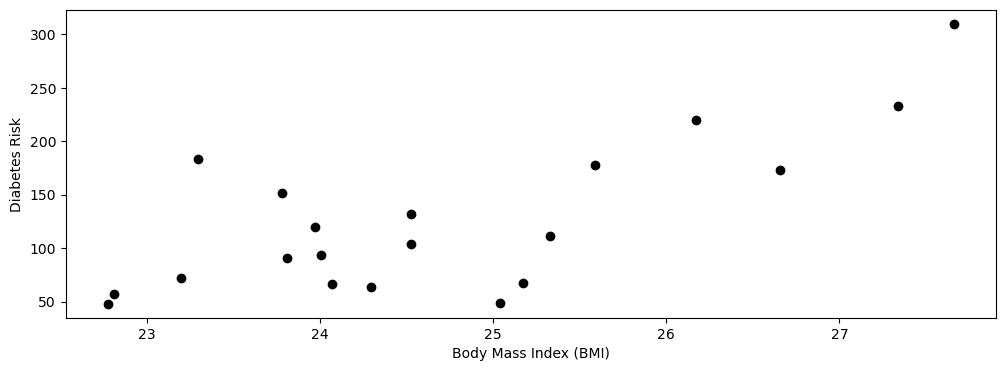

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')

# The Model Family

Let's assume that risk is a linear function of BMI. In other words, for some unknown $\theta_0, \theta_1 \in \mathbb{R}$, we have
$$ y = \theta_1 \cdot x + \theta_0, $$
where $x$ is the BMI (also called the independent variable), and $y$ is the diabetes risk score (the dependent variable). 

The parameters $\theta_1, \theta_0$ are the slope and the intercept of the line relates $x$ to $y$.

The combination of variations of $\theta_1, \theta_0$ create the model family. 

We can visualize this for a few values of $\theta_1, \theta_0$.

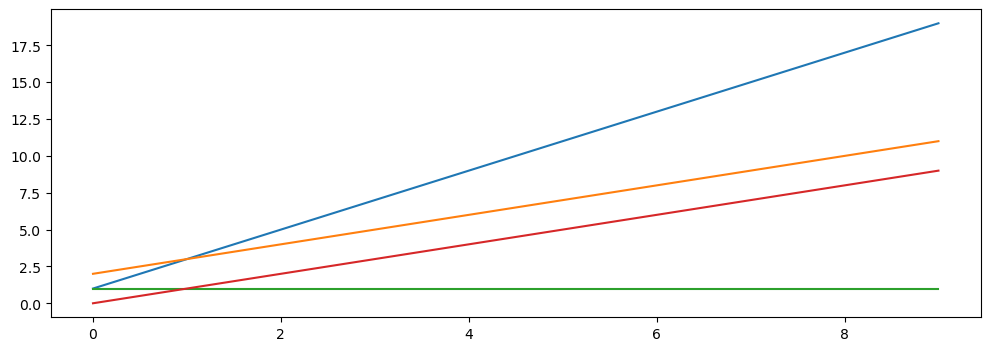

In [3]:
theta_list = [(1, 2), (2,1), (1,0), (0,1)]
for theta0, theta1 in theta_list:
    x = np.arange(10)
    y = theta1 * x + theta0
    plt.plot(x,y)

# A Supervised Learning Algorithm: The Optimizer

Given our assumption that $x,y$ follow the a linear relationship, the goal of a supervised learning algorithm is to find a good set of parameters consistent with the data.

This is an optimization problem.

For now, let's call the `sklearn.linear_model` library to find a $\theta_1, \theta_0$ that fit the data well.

In [4]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train.values)

# Make predictions on the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train)

# The coefficients
print('Slope (theta1): \t', regr.coef_[0])
print('Intercept (theta0): \t', regr.intercept_)

Slope (theta1): 	 37.37884216051767
Intercept (theta0): 	 -797.0817390342371


# A Supervised Learning Model

The supervised learning algorithm gave us a pair of parameters $\theta_1^*, \theta_0^*$. These define the *predictive model* $f^*$, defined as
$$ f(x) = \theta_1^* \cdot x + \theta_0^*, $$
where again $x$ is the BMI, and $y$ is the diabetes risk score.

We can visualize the linear model that best fits our data.

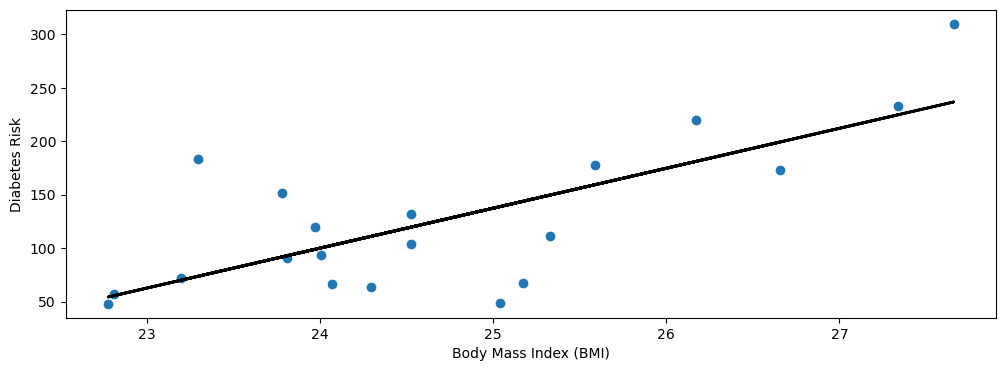

In [5]:
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.plot(diabetes_X_train, diabetes_y_train_pred, color='black', linewidth=2)

# Making New Predictions

Given a new dataset of patients with a known BMI, we can use this model to estimate their diabetes risk.

Given an $x_\text{new}$, we can output prediction $y_\text{new}$ as
$$ y_\text{new} = f(x_\text{new}) = \theta_1^* \cdot x_\text{new} + \theta_0. $$

Let's start by loading more data. We will load three new patients (shown in red below) that we haven't seen before.

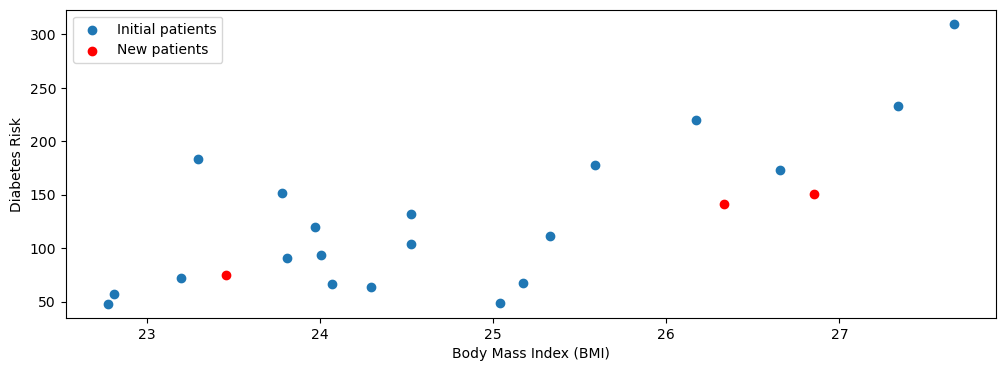

In [6]:
# Collect 3 data points
diabetes_X_test = diabetes_X.iloc[:3]
diabetes_y_test = diabetes_y.iloc[:3]

plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test,  color='red')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.legend(['Initial patients', 'New patients'])

Our linear model provides an estimate of the diabetes risk for these patients.

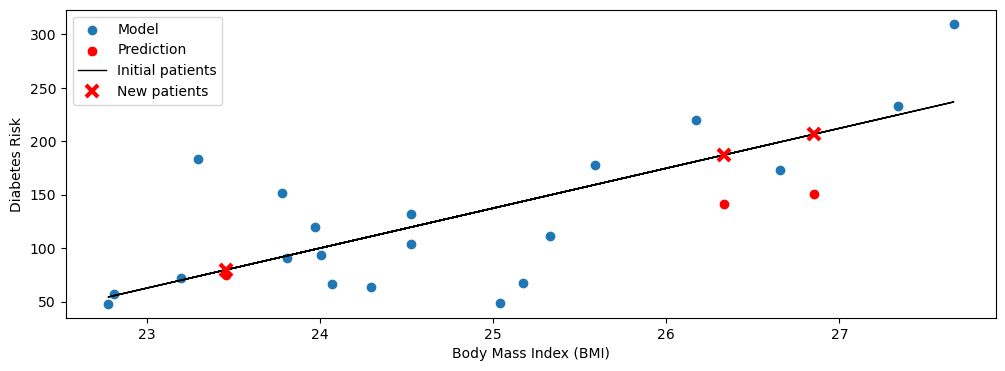

In [7]:
# generate predictions on the new patients
diabetes_y_test_pred = regr.predict(diabetes_X_test)

# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train, diabetes_y_train)
plt.scatter(diabetes_X_test, diabetes_y_test, color='red', marker='o')
plt.plot(diabetes_X_train, diabetes_y_train_pred, color='black', linewidth=1)
plt.plot(diabetes_X_test, diabetes_y_test_pred, 'x', color='red', mew=3, markersize=8)
plt.legend(['Model', 'Prediction', 'Initial patients', 'New patients'])

# Why Supervised Learning?

Supervised learning can be useful in many ways.
* Making predictions on new data.
* Understanding the mechanisms through which input variables affect targets.

# Applications of Supervised Learning

Many of the most important applications of machine learning are supervised:
* Classifying medical images.
* Translating between pairs of languages.
* Detecting objects in a self-driving car.

<left><img width=25% src="img/gw_monogram_2c.png"></left>
# Part 2: Anatomy of a Supervised Learning Problem: The Dataset

We have seen an example of supervised machine learning.

Let's now examine more closely the components of a supervised learning problem, starting with the dataset.

# Recall: Three Components of a Supervised Machine Learning Problem

To apply supervised learning, we define a dataset and a learning algorithm.

$$ \text{Dataset} + \text{Learning Algorithm} \to \text{Predictive Model} $$

The output is a predictive model that maps inputs to targets. For instance, it can predict targets on new inputs.

# A Supervised Learning Dataset

Let's dive deeper into what's a supervised learning dataset. 

We will again use the UCI Diabetes Dataset as our example.

The UCI dataset contains many additional data columns besides `bmi`, including age, sex, and blood pressure. We can ask `sklearn` to give us more information about this dataset.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
from sklearn import datasets

# Load the diabetes dataset
diabetes = datasets.load_diabetes(as_frame=True)
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

# A Supervised Learning Dataset: Notation

We say that a training dataset of size $n$ (e.g., $n$ patients) is a set
$$\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$$

Each $x^{(i)}$ denotes an input (e.g., the measurements for patient $i$), and each $y^{(i)} \in \mathcal{Y}$ is a target (e.g., the diabetes risk). 

Together, $(x^{(i)}, y^{(i)})$ form a *training example*.

We can look at the diabetes dataset in this form.

In [9]:
# Load the diabetes dataset
diabetes_X, diabetes_y = diabetes.data, diabetes.target

# Print part of the dataset
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


# Training Dataset: Inputs

More precisely, an input $x^{(i)} \in \mathcal{X}$ is a $d$-dimensional vector of the form
$$ x^{(i)} = \begin{bmatrix}
x^{(i)}_1 \\
x^{(i)}_2 \\
\vdots \\
x^{(i)}_d
\end{bmatrix}$$
For example, it could be the values of the $d$ features for patient $i$.

The set $\mathcal{X}$ is called the feature space. Often, we have, $\mathcal{X} = \mathbb{R}^d$.

Let's look at data for one patient.

In [10]:
diabetes_X.iloc[0]

age    0.038076
sex    0.050680
bmi    0.061696
bp     0.021872
s1    -0.044223
s2    -0.034821
s3    -0.043401
s4    -0.002592
s5     0.019908
s6    -0.017646
Name: 0, dtype: float64

# Training Dataset: Attributes

We refer to the numerical variables describing the patient as *attributes*. Examples of attributes include:
* The age of a patient.
* The patient's gender.
* The patient's BMI.

Note that thes attributes in the above example have been mean-centered at zero and re-scaled to have a variance of one.

# Training Dataset: Features

Often, an input object has many attributes, and we want to use these attributes to define more complex descriptions of the input.

* Is the patient old and a man? (Useful if old men are at risk).
* Is the BMI above the obesity threshold?

We call these custom attributes *features*.

Let's create an "old man" feature.

In [11]:
diabetes_X['old_man'] = (diabetes_X['sex'] > 0) & (diabetes_X['age'] > 0.05)
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,old_man
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,False
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,False
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,True
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,False
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,False


# Training Dataset: Features

We may denote features via a function $\phi : \mathcal{X} \to \mathbb{R}^p$ that takes an input $x^{(i)} \in \mathcal{X}$ and outputs a $p$-dimensional vector
$$ \phi(x^{(i)}) = \left[\begin{array}{@{}c@{}}
\phi(x^{(i)})_1 \\
\phi(x^{(i)})_2 \\
\vdots \\
\phi(x^{(i)})_p
\end{array} \right]$$
We say that $\phi(x^{(i)})$ is a *featurized* input, and each $\phi(x^{(i)})_j$ is a *feature*.

# Features vs Attributes

In practice, the terms attribute and features are often used interchangeably. Most authors refer to $x^{(i)}$ as a vector of features. 

We will follow this convention and use the term "attribute" only when there is ambiguity between features and attributes.

# Features: Discrete vs. Continuous 

Features can be either discrete or continuous. We will see that some ML algorthims handle these differently.

The BMI feature that we have seen earlier is an example of a continuous feature.

We can visualize its distribution.

<AxesSubplot:>

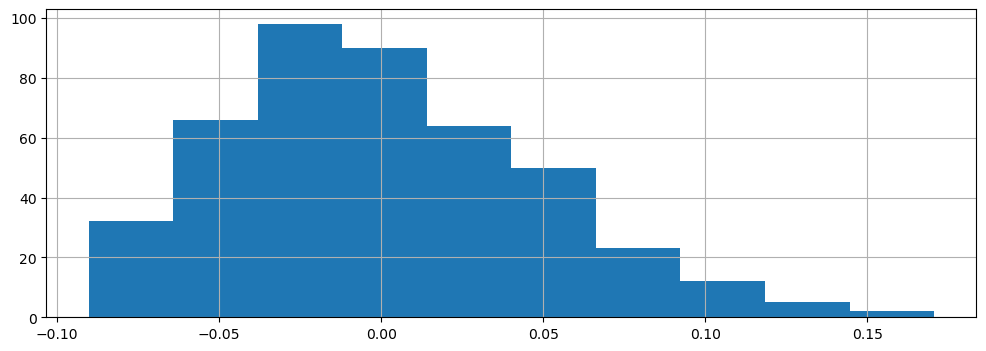

In [12]:
diabetes_X.loc[:, 'bmi'].hist()

Other features take on one of a finite number of discrete values. The `sex` column is an example of a categorical feature.

In this example, the dataset has been pre-processed such that the two values happen to be `0.05068012` and `-0.04464164`.

[ 0.05068012 -0.04464164]


<AxesSubplot:>

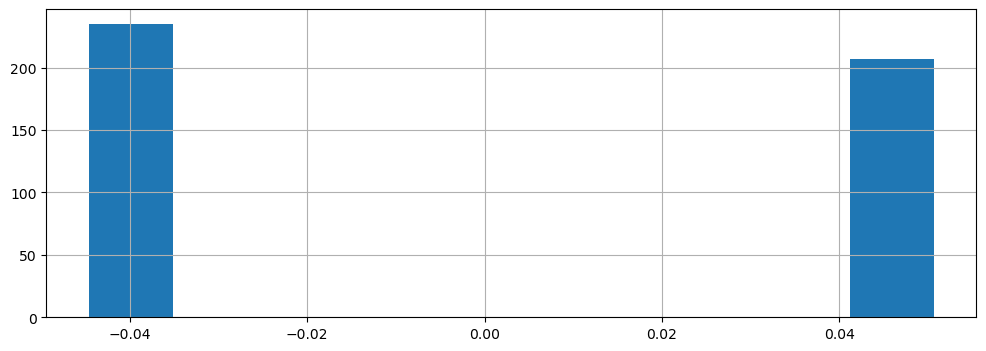

In [13]:
print(diabetes_X.loc[:, 'sex'].unique())
diabetes_X.loc[:, 'sex'].hist()

# Training Dataset: Targets

For each patient, we are interested in predicting a quantity of interest, the *target*. In our example, this is the patient's diabetes risk.

Formally, when $(x^{(i)}, y^{(i)})$ form a *training example*, each $y^{(i)} \in \mathcal{Y}$ is a target. We call $\mathcal{Y}$ the target space.

We plot the distirbution of risk scores below.

<AxesSubplot:xlabel='Diabetes risk score', ylabel='Number of patients'>

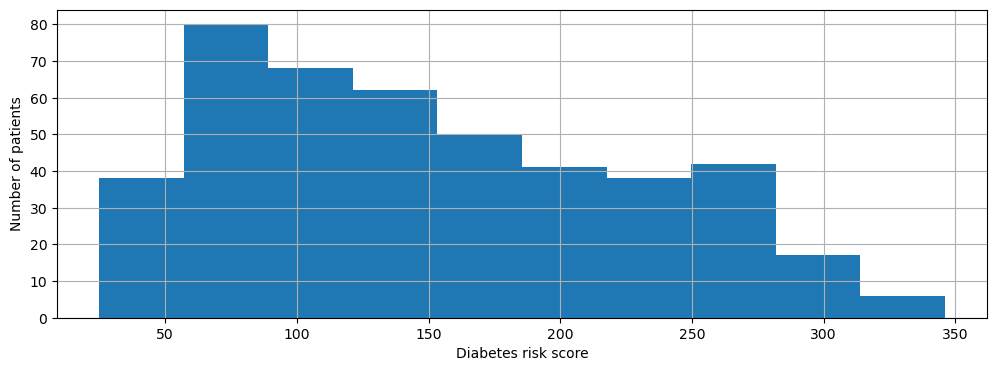

In [14]:
plt.xlabel('Diabetes risk score')
plt.ylabel('Number of patients')
diabetes_y.hist()

# Targets: Regression vs. Classification

We distinguish between two broad types of supervised learning problems that differ in the form of the target variable.

1. __Regression__: The target variable $y$ is continuous. We are fitting a curve in a high-dimensional feature space that approximates the shape of the dataset.
2. __Classification__: The target variable $y$ is discrete. Each discrete value corresponds to a *class* and we are looking for a hyperplane that separates the different classes.

We can easily turn our earlier regression example into classification by discretizing the diabetes risk scores into high or low.

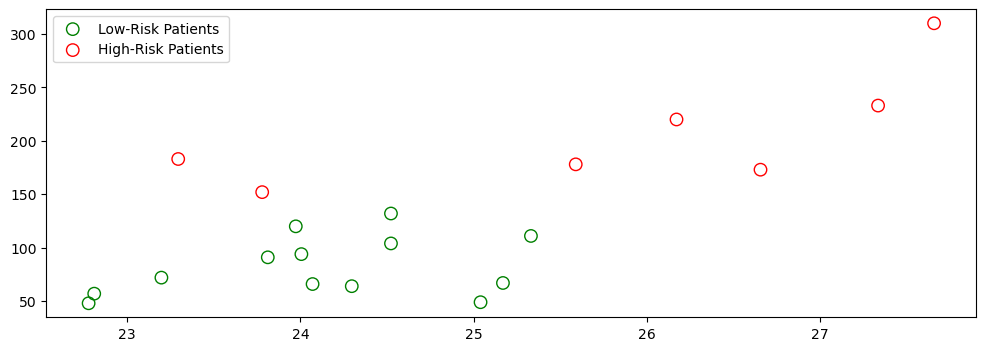

In [15]:
# Discretize the targets
diabetes_y_train_discr = np.digitize(diabetes_y_train, bins=[150])

# Visualize it
plt.scatter(diabetes_X_train[diabetes_y_train_discr==0], diabetes_y_train[diabetes_y_train_discr==0], marker='o', s=80, facecolors='none', edgecolors='g')
plt.scatter(diabetes_X_train[diabetes_y_train_discr==1], diabetes_y_train[diabetes_y_train_discr==1], marker='o', s=80, facecolors='none', edgecolors='r')
plt.legend(['Low-Risk Patients', 'High-Risk Patients'])

Let's try to generate predictions for this dataset.

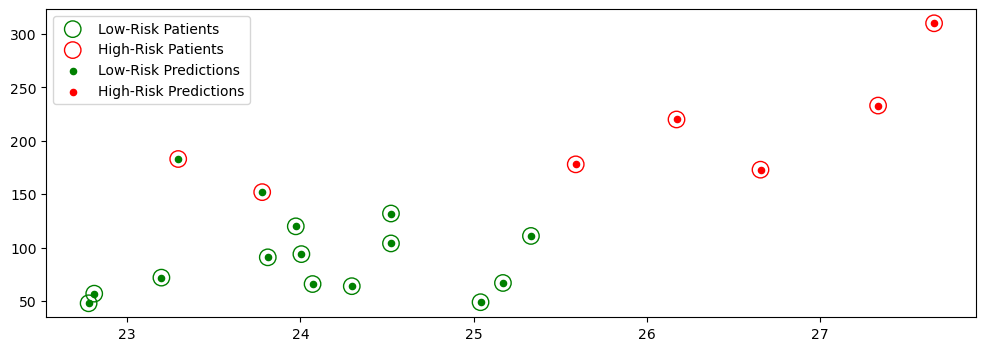

In [16]:
# Create logistic regression object (note: this is actually a classification algorithm!)
clf = linear_model.LogisticRegression()

# Train the model using the training sets
clf.fit(diabetes_X_train, diabetes_y_train_discr)

# Make predictions on the training set
diabetes_y_train_pred = clf.predict(diabetes_X_train)

# Visualize it
plt.scatter(diabetes_X_train[diabetes_y_train_discr==0], diabetes_y_train[diabetes_y_train_discr==0], marker='o', s=140, facecolors='none', edgecolors='g')
plt.scatter(diabetes_X_train[diabetes_y_train_discr==1], diabetes_y_train[diabetes_y_train_discr==1], marker='o', s=140, facecolors='none', edgecolors='r')
plt.scatter(diabetes_X_train[diabetes_y_train_pred==0], diabetes_y_train[diabetes_y_train_pred==0], color='g', s=20)
plt.scatter(diabetes_X_train[diabetes_y_train_pred==1], diabetes_y_train[diabetes_y_train_pred==1], color='r', s=20)
plt.legend(['Low-Risk Patients', 'High-Risk Patients', 'Low-Risk Predictions', 'High-Risk Predictions'])

<left><img width=25% src="img/gw_monogram_2c.png"></left>
# Part 3: Anatomy of a Supervised Learning Problem: The Learning Algorithm

Let's now look at what a general supervised learning algorithm looks like.

# Recall: Three Components of a Supervised Machine Learning Problem

To apply supervised learning, we define a dataset and a learning algorithm.

$$ \text{Dataset} + \text{Learning Algorithm} \to \text{Predictive Model} $$

The output is a predictive model that maps inputs to targets. For instance, it can predict targets on new inputs.

# The Components of a Supervised Machine Learning Algorithm

We can also define the high-level structure of a supervised learning algorithm as consisting of three components:
* A __model class__: the set of possible models we consider.
* An __objective__ function, which defines how good a model is.
* An __optimizer__, which finds the best predictive model in the model class according to the objective function

Let's look again at our diabetes dataset for an example.

In [17]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

# Load the diabetes dataset
diabetes = datasets.load_diabetes(as_frame=True)
diabetes_X, diabetes_y = diabetes.data, diabetes.target

# Print part of the dataset
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


# Model: Notation

We'll say that a model is a function
$$ f : \mathcal{X} \to \mathcal{Y} $$
that maps inputs $x \in \mathcal{X}$ to targets $y \in \mathcal{Y}$.

Often, models have *parameters* $\theta \in \Theta$ living in a set $\Theta$. We will then write the model as
$$ f_\theta : \mathcal{X} \to \mathcal{Y} $$
to denote that it's parametrized by $\theta$.

### <span style="color:red; font-weight:bold;">NOTE:</span>
In Machine Learning terminology the model $f$ is also represented as $h$ interchangeably, which stands for **"hypothesis"** 

# Model Class: Notation

Formally, the model class is a set 
$$\mathcal{M} \subseteq \{f \mid f : \mathcal{X} \to \mathcal{Y} \}$$
of possible models that map input features to targets.

When the models $f_\theta$ are paremetrized by *parameters* $\theta \in \Theta$ living in some set $\Theta$. Thus we can also write
$$\mathcal{M} = \{f_\theta \mid \theta \in \Theta \}.$$

# Model Class: Example

One simple approach is to assume that $x$ and $y$ are related by a linear model of the form
\begin{align*}
y & = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + ... + \theta_d \cdot x_d
\end{align*}
where $x$ is a featurized input and $y$ is the target.

The $\theta_j$ are the *parameters* of the model, $\Theta = \mathbb{R}^{d+1}$, and $\mathcal{M} = \{ \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + ... + \theta_d \cdot x_d \mid \theta \in \mathbb{R}^{d+1} \}$
<!-- By using the notation $x_0 = 1$, we can represent the model in a vectorized form
$$ y = \sum_{j=0}^d \beta_j \cdot x_j = \vec \beta \cdot \vec x. $$
where $\vec x$ is a vector of features. -->

# Objectives: Notation

<!-- Given a training set, how do we pick the parameters $\theta$ for the model? A natural approach is to select $\theta$ such that $f_\theta(x^{(i)})$ is close to $y^{(i)}$ on a training dataset $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$. -->

To capture this intuition, we define an *objective function* (also called a *loss function*)
$$J(f) : \mathcal{M} \to [0, \infty), $$
which describes the extent to which $f$ "fits" the data $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$.

When $f$ is parametrized by $\theta \in \Theta$, the objective becomes a function $J(\theta) : \Theta \to [0, \infty).$

# Objective: Examples

What would are some possible objective functions? We will see many, but here are a few examples:
* Mean squared error: $$J(\theta) = \frac{1}{2n} \sum_{i=1}^n \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2$$
* Absolute (L1) error: $$J(\theta) = \frac{1}{n} \sum_{i=1}^n \left| f_\theta(x^{(i)}) - y^{(i)} \right|$$

These are defined for a dataset $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$.

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y1 = np.array([1, 2, 3, 4])
y2 = np.array([-1, 1, 3, 5])

print('Mean squared error: %.2f' % mean_squared_error(y1, y2))
print('Mean absolute error: %.2f' % mean_absolute_error(y1, y2))

Mean squared error: 1.50
Mean absolute error: 1.00


# Optimizer: Notation

At a high-level an optimizer takes an objective $J$ and a model class $\mathcal{M}$ and finds a model $f \in \mathcal{M}$ with the smallest value of the objective $J$.

\begin{align*}
\min_{f \in \mathcal{M}} J(f)
\end{align*}

Intuitively, this is the function that bests "fits" the data on the training dataset.

When $f$ is parametrized by $\theta \in \Theta$, the optimizer minimizes a function $J(\theta)$ over all $\theta \in \Theta$.

# Optimizer: Example

We will see that behind the scenes, the `sklearn.linear_models.LinearRegression` algorithm optimizes the MSE loss.

\begin{align*}
\min_{\theta \in \mathbb{R}} \frac{1}{2n} \sum_{i=1}^n \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2
\end{align*}

We can easily measure the quality of the fit on the training set and the test set.

Let's run the above algorithm on our diabetes dataset.

In [19]:
# Collect 20 data points for training
diabetes_X_train = diabetes_X.iloc[-20:]
diabetes_y_train = diabetes_y.iloc[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train.values)

# Make predictions on the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train)

# Collect 3 data points for testing
diabetes_X_test = diabetes_X.iloc[:3]
diabetes_y_test = diabetes_y.iloc[:3]

# generate predictions on the new patients
diabetes_y_test_pred = regr.predict(diabetes_X_test)

The algorithm returns a predictive model. We can visualize its predictions below.

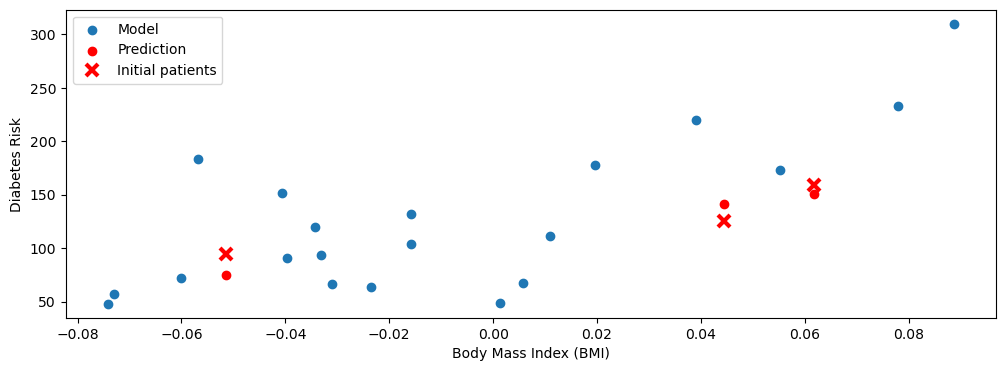

In [20]:
# visualize the results
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Diabetes Risk')
plt.scatter(diabetes_X_train.loc[:, ['bmi']], diabetes_y_train)
plt.scatter(diabetes_X_test.loc[:, ['bmi']], diabetes_y_test, color='red', marker='o')
# plt.scatter(diabetes_X_train.loc[:, ['bmi']], diabetes_y_train_pred, color='black', linewidth=1)
plt.plot(diabetes_X_test.loc[:, ['bmi']], diabetes_y_test_pred, 'x', color='red', mew=3, markersize=8)
plt.legend(['Model', 'Prediction', 'Initial patients', 'New patients'])

In [21]:
from sklearn.metrics import mean_squared_error

print('Training set mean squared error: %.2f'
      % mean_squared_error(diabetes_y_train, diabetes_y_train_pred))
print('Test set mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_test_pred))
print('Test set mean squared error on random inputs: %.2f'
      % mean_squared_error(diabetes_y_test, np.random.randn(*diabetes_y_test_pred.shape)))

Training set mean squared error: 1144.28
Test set mean squared error: 228.50
Test set mean squared error on random inputs: 16024.62


# Summary: Components of a Supervised Machine Learning Problem

To apply supervised learning, we define a dataset and a learning algorithm.

$$ \underbrace{\text{Dataset}}_\text{Features, Attributes, Targets} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Predictive Model} $$

The output is a predictive model that maps inputs to targets. For instance, it can predict targets on new inputs.

# Notation: Feature Matrix

Suppose that we have a dataset of size $n$ (e.g., $n$ patients), indexed by $i=1,2,...,n$. Each $x^{(i)}$ is a vector of $d$ features.

#### Feature Matrix
Machine learning algorithms are most easily defined in the language of linear algebra. Therefore, it will be useful to represent the entire dataset as one matrix $X \in \mathbb{R}^{n \times d}$, of the form:
$$ X = \begin{bmatrix}
x^{(1)}_1 & x^{(2)}_1 & \ldots & x^{(n)}_1 \\
x^{(1)}_2 & x^{(2)}_2 & \ldots & x^{(n)}_2 \\
\vdots \\
x^{(1)}_d & x^{(2)}_d & \ldots & x^{(n)}_d
\end{bmatrix}.$$

Similarly, we can vectorize the target variables into a vector $y \in \mathbb{R}^n$ of the form
$$ y = \begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(n)}
\end{bmatrix}.$$

# Machine Learning Setup

$\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\} \subseteq \mathbb{R}^{d}\times C$

where:

$\mathbb{R}^{d}:$ $d$-dimensional feature space

$x^{i}:$ 		input vector of the ith sample

$y^{i}:$ 		label of the ith sample

$C$:		label space (Only in Supervised Learning setting)


# Machine Learning Setup

- Unitimately, we want to learn a function $f$ (or $h$)
- Such that for a new pair $(x,y)$~$\mathbb{P}$ (unseen pair by the model during the training)
    - $h(x)=y$ with high probability.
    - In other words $h(x)\approx y$

# Some Supervised Learning Scenarios

| Scenario | Label Space | Example |
|----------|----------|----------|
|   Binary Classification  |   $\{1,-1\}$, or $\{1,0\}$, etc  |   spam classification  |
|   Multi-class Classification  |   $\{$*Armin, Sardar, Donald Trump*$\}$  |   Face classification. A person can only to one class of many classes.  |
|Multi-label Classification|$\{$*Horror, Romance, Comedy*$\}$|Movie genre classification. Each movie can belong to multiple genre.|
|Regression|A continous range of values such as $\mathbb{R}$|House price prediction|


# Machine Learning Process
1. First pick a *hypothesis* class $\mathcal{H}$ (or *model* class $\mathcal{M}$) from all available classes. For instance:
    - Linear Regression
    - or Decision Trees
2. Find (train) the best function $h \in \mathcal{H}$. This is the *"Learning"* process.

Essentially learning is try to find the function $h$ from all possible functions within the Hypothesis class $\mathcal{H}$ that,
- That makes the fewest mistakes within out Training data
- By assessing mistake using a ***Loss function***

# Bad Example of Learning $h$
- Randomly select $h$ from $\mathcal{H}$ and use for prediction.
- Test all functions $h$ in $\mathcal{H}$ and use the best performing for prediction.

# Loss Functions

For a given $h \in \mathcal{H}$:
- A ***Loss function*** evaluates a hypothesis $h$
    - On our training data and tells us how good or bad our trained model $h$ is
    - The higher the loss the worse the perforamance of the model is
    - A Loss of **0 zero** indicates perfect prediction
- It is common practive to normalize Loss by the total number of training data $n$
    - Thus, the output can be interpreted as the average Loss per sample
    - Loss will be independent of $n$

# Example Loss Functions: *Zero/One*
$L_{0/1}(h) = \frac{1}{n} \sum_{i=1}^{n} \delta_{h(x_i) \neq y_i}, \delta_{h(x_i) \neq y_i} = 
\begin{cases} 
1 & \text{if } h(x_i) \neq y_i \\ 
0 & \text{otherwise}
\end{cases}
$

- The simplest Loss function
- Counts how many mistakes hypothesis ***$h$*** makes on the training set
    - ***1*** if mis-predicted
    - ***0*** otherwise

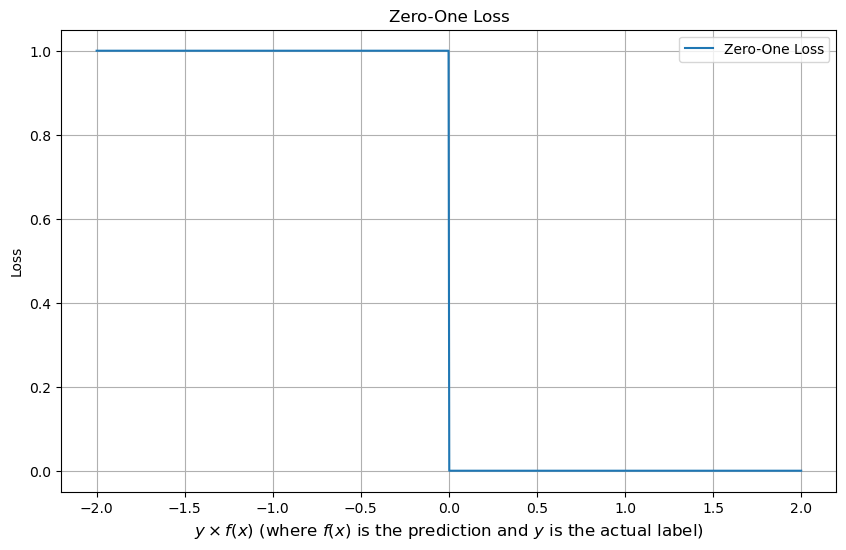

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Values for y * f(x)
y_fx = np.linspace(-2, 2, 1000)

# Zero-one loss function
zero_one_loss = y_fx < 0

# Plot the zero-one loss
plt.figure(figsize=(10, 6))
plt.plot(y_fx, zero_one_loss, label='Zero-One Loss')
plt.xlabel(r'$y \times f(x)$ (where $f(x)$ is the prediction and $y$ is the actual label)', fontsize=12)
plt.ylabel('Loss')
plt.title('Zero-One Loss')
plt.legend()
plt.grid(True)
plt.show()


# Absolute Loss

$L_{absolute}(h) = \frac{1}{n} \sum_{i=1}^{n} |h(x_i) - y_i|$


- Useful in regression problems where you want to minimize the magnitude of the error
- Without concerning too much about its direction

- **PROS:**
    - Less sensitive to outliers than the square loss function, because it does not square the errors.
    - Clear interpretation - the average loss is the *median* of the errors in prediction.

- **CONS:**
    - It is not smooth at the origin, which can make the optimization problem more difficult
    - Doesn't differentiate between under-prediction and over-prediction
    - For some problems, you might want a loss function that penalizes these differently.

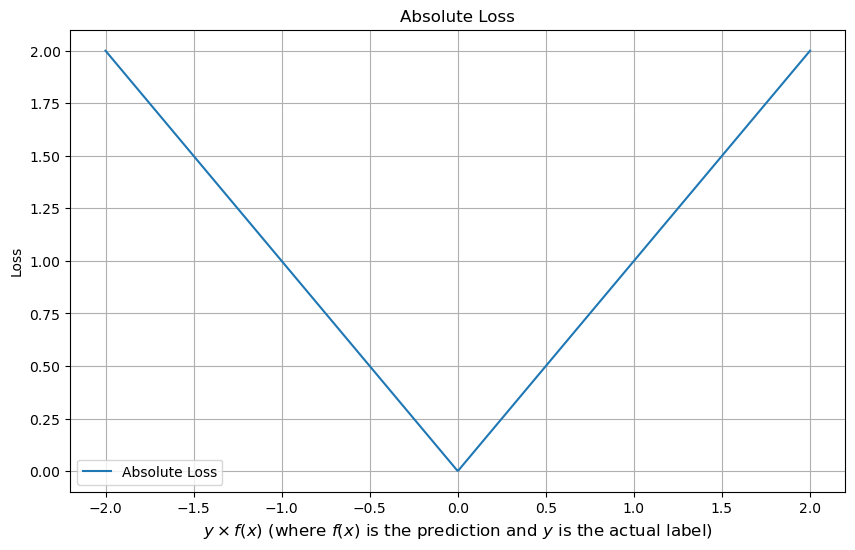

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Values for y - f(x)
y_fx = np.linspace(-2, 2, 1000)

# Absolute loss function
absolute_loss = np.abs(y_fx)

# Plot the absolute loss
plt.figure(figsize=(10, 6))
plt.plot(y_fx, absolute_loss, label='Absolute Loss')
plt.xlabel(r'$y \times f(x)$ (where $f(x)$ is the prediction and $y$ is the actual label)', fontsize=12)
plt.ylabel('Loss')
plt.title('Absolute Loss')
plt.legend()
plt.grid(True)
plt.show()


# Generalization in Machine Learning

- **Definition**: Generalization refers to a model's ability to adapt properly to new, unseen data, drawn from the same distribution as the one used to create the model.

- **Importance**: The ultimate goal of machine learning is to achieve good generalization.
    - It's not enough for a model to learn the training data well (in fact not the goal of ML)
    - It **must** perform well on new unseen data.

# Generalization

For $h \in \mathcal{H},  \forall (x, y) \sim P, \quad h(x) \approx y $

Given a loss function, we can then attempt to find the function $h$ that minimizes the loss:

$ h = argmin_{h \in \mathcal{H}} L(h) $



- We want for,

$h \in \mathcal{H}$,  $\forall (x, y) \sim P, \quad h(x) \approx y $


- In other words we want,

$ E[Loss(h(x,y))]_{(x,y)~P} < \epsilon$

- Thus, can we simply minimize the above expection? Why?

 <span style="color:red; font-weight:bold;">NO</span>, because we don't know what $P$ is.

- A big part of machine learning focuses on the question, how to do this minimization efficiently.

- If you find a function $h(⋅)$ with low loss on your data $\mathcal{D}$
- how do you know whether it will still get examples right that are not in $\mathcal{D}$?

# Question: Memorizer
Imagine the following Loss function. What do you think of it's performance?

$$
h(x) = 
\begin{cases} 
y_i & \text{if } \exists (x_i, y_i) \in D, \text{ s.t. } x = x_i \\ 
0 & \text{otherwise}
\end{cases}
$$

# So what do we do?

# Generalization

- We can calculate an estimate
- we usually split $\mathcal{D}$ into three subsets: 
    - $\mathcal{D}_{TR}$ as the training set
    - $\mathcal{D}_{VA}$ as the validation set (in some textbooks this is called **"test"** set)
    - $\mathcal{D}_{TE}$ as the test set (in some textbooks this is called **"holdout"** set)
    
- We choose (train) $h(⋅)$ based on $\mathcal{D}_{TR}$
- Evaluate $h(⋅)$ on $\mathcal{D}_{VA}$ and select the best model
- Report the performance on $\mathcal{D}_{TE}$
